In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import math 

In [11]:
# collecting data sets
data_set = pd.read_csv('/home/justice/Desktop/Machine Learning Project/Data set/diabetes.csv')
data_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


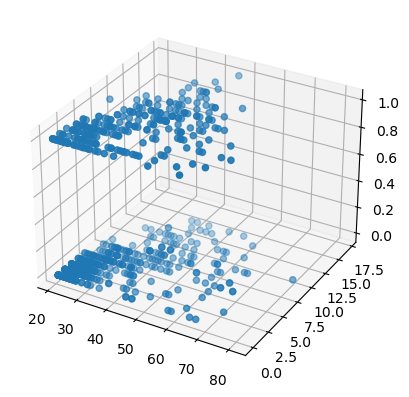

In [4]:
# trying to plot the graph
fig = plt.figure()
ax =fig.add_subplot(111,projection='3d')
ax.scatter(data_set["Age"],data_set["Pregnancies"],data_set["Outcome"])
plt.show()

In [12]:
"""using the gradient descent algorithm and using the function 
yhat = (cos(w0 + w1p + w2g + w3b + w4s)+1)/2
loss function = (y-yhat)2
2*(y-yhat)*
"""
def gradientDescent(learning_rate, data_set, w0, w1, w2, w3, w4):
    n = data_set.shape[0]
    dldw0, dldw1, dldw2, dldw3, dldw4 = 0, 0, 0, 0, 0
    
    # differenciation with respect to w's
    for _, row in data_set.iterrows():  # Use a different variable name, like 'row'
        const = (row["Outcome"] - (math.cos(w0 + w1 * row["Pregnancies"] + w2 * row["Glucose"] + w3 * row["BloodPressure"] + w4 * row["SkinThickness"]) +1)/2)
        dldw0 = dldw0 + const * (1 * math.sin(w0 + w1 * row["Pregnancies"] + w2 * row["Glucose"] + w3 * row["BloodPressure"] + w4 * row["SkinThickness"]) * 1)
        dldw1 = dldw1 + const * (1 * row["Pregnancies"] * math.sin(w0 + w1 * row["Pregnancies"] + w2 * row["Glucose"] + w3 * row["BloodPressure"] + w4 * row["SkinThickness"]) * 1)
        dldw2 = dldw2 + const * (1 * row["Glucose"] * math.sin(w0 + w1 * row["Pregnancies"] + w2 * row["Glucose"] + w3 * row["BloodPressure"] + w4 * row["SkinThickness"]) * 1)
        dldw3 = dldw3 + const * (1 * row["BloodPressure"] * math.sin(w0 + w1 * row["Pregnancies"] + w2 * row["Glucose"] + w3 * row["BloodPressure"] + w4 * row["SkinThickness"]) * 1)
        dldw4 = dldw4 + const * (1 * row["SkinThickness"] * math.sin(w0 + w1 * row["Pregnancies"] + w2 * row["Glucose"] + w3 * row["BloodPressure"] + w4 * row["SkinThickness"]) * 1)
    
    w0 = w0 - dldw0 * learning_rate * (1/n)
    w1 = w1 - dldw1 * learning_rate * (1/n)
    w2 = w2 - dldw2 * learning_rate * (1/n)
    w3 = w3 - dldw3 * learning_rate * (1/n)
    w4 = w4 - dldw4 * learning_rate * (1/n)
    
#     mse
    def Mse(data_set, w0, w1, w2, w3, w4):
        smse = 0
        n = data_set.shape[0]
        for _,row in data_set.iterrows():
            smse = smse + (row["Outcome"] - (math.cos(w0 + w1 * row["Pregnancies"] + w2 * row["Glucose"] + w3 * row["BloodPressure"] + w4 * row["SkinThickness"])+ 1)/2)**2
            
        mse = smse/n
        return mse
                  
    return w0, w1, w2, w3, w4, Mse(data_set, w0, w1, w2, w3, w4)


In [13]:
# training activity
# mse = 0
w0=   0.6
w1=  -0.07
w2=  -0.02
w3=   0.03
w4=   0.003
learning_rate  = 0.0001
msep = 1
i = 0
mse =1

# while(True):
#     i = i+1 
#     w0,w1,w2,w3,w4,mse = gradientDescent(learning_rate,data_set,w0,w1,w2,w3,w4)
#     if(mse>msep or mse < 0.05):
#         break
#     else:
#         msep = mse
#         print (f"{i}  {w0}  {w1}  {w2}  {w3}  {w4}  with error {mse}")
        

In [14]:
def  wo_positions(i,w0,w1,w2,w3,w4,mse,msep):
    while(i< 100):
        i = i+1 
        w0,w1,w2,w3,w4,mse = gradientDescent(learning_rate,data_set,w0,w1,w2,w3,w4)
        if(mse>msep or mse < 0.05):
            break
        else:
            msep = mse
            print (f"{i}  {w0}  {w1}  {w2}  {w3}  {w4}  with error {mse}")
            
    

In [15]:
wo_positions(i,w0,w1,w2,w3,w4,mse,msep)

1  0.6000162953133007  -0.06996082512406478  -0.01839314035074578  0.031226246275878194  0.003365499417411066  with error 0.4949431752654479
2  0.600039368289227  -0.06989714614836146  -0.01601968279807016  0.032903615534006794  0.003854813746696448  with error 0.39675346993814936
3  0.6000664162541886  -0.06981194353508502  -0.013095640951453151  0.03479914564441846  0.004397310319342906  with error 0.28474560810818855
4  0.600085999926442  -0.06974564027634951  -0.010976407535332914  0.03607737212234979  0.004748016199863861  with error 0.241682814660537
5  0.6000944669169734  -0.06972139556950528  -0.010232506575848939  0.036536843065176496  0.004854173084752773  with error 0.23659557664819383
6  0.6000988300500115  -0.06971434577468431  -0.010011928044823776  0.03670668895383492  0.004875353729622654  with error 0.23606709377775495
7  0.6001019552926713  -0.06971265103389496  -0.009949793555568331  0.03679061955808028  0.004871659217521629  with error 0.23598600792811772
8  0.60010

59  0.6002278594287973  -0.06978712595949958  -0.010741196518769437  0.03859617324474316  0.004176114938637546  with error 0.23512836196895373
60  0.6002302052539126  -0.06978893453115292  -0.010754597566981874  0.038624896347496926  0.00416500315627972  with error 0.23511703039039686
61  0.6002325488458272  -0.06979075452771988  -0.010767909014578173  0.03865343307143769  0.004153967509668407  with error 0.23510584553025293
62  0.6002348902223089  -0.06979258586443877  -0.010781131443013577  0.038681784606473285  0.004143007324121977  with error 0.23509480544682218
63  0.600237229400969  -0.06979442845714177  -0.010794265430797685  0.0387099521364981  0.004132121932478624  with error 0.2350839082235532
64  0.6002395663992637  -0.06979628222225127  -0.010807311553486736  0.03873793683938017  0.004121310675002752  with error 0.2350731519687503
65  0.6002419012344952  -0.06979814707677637  -0.010820270383676552  0.038765739886949445  0.0041105728992924815  with error 0.2350625348152777
6

In [ ]:
for _, row in data_set.iterrows():
    print(row["Pregnancies"]*row["Glucose"])

In [2]:
(math.cos(0.418638449380166 + -0.08532653043183686*6  + -0.012352988497836918*148 + 0.04610408170810036*72 + 0.002006667700768592*35 )+1)/2  

0.5512260117071196